<a href="https://colab.research.google.com/github/sookyannnn/SIEW-2022-Economic-Geography-in-East-Asia-and-Pacfic/blob/main/CH02_Urbanisation_(Directional_LISA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In [1]:
pip install pysal #restart runtime to use latest version

  Using cached https://files.pythonhosted.org/packages/09/c6/d3e3abe5b4f4f16cf0dfc9240ab7ce10c2baa0e268989a4e3ec19e90c84e/urllib3-1.26.4-py2.py3-none-any.whl
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11


In [2]:
pip install libpysal

  Using cached https://files.pythonhosted.org/packages/56/aa/4ef5aa67a9a62505db124a5cb5262332d1d4153462eb8fd89c9fa41e5d92/urllib3-1.25.11-py2.py3-none-any.whl
ERROR: pysal 2.4.0 has requirement urllib3>=1.26, but you'll have urllib3 1.25.11 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.26.4
    Uninstalling urllib3-1.26.4:
      Successfully uninstalled urllib3-1.26.4


In [3]:
pip install giddy

In [4]:
pip install geopandas 

In [5]:
pip install splot

# Load Packages

In [6]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from giddy.directional import Rose
from pysal.lib import weights
import libpysal
import splot
from splot.giddy import dynamic_lisa_composite

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


# Load Dataset

1.   Duplicate this Google Drive folder : https://drive.google.com/drive/folders/1C0lNnGSsCGdQ8kC-gGEBYt8L9UeAaNcv?usp=sharing
2.   Mount Google Drive to Google Collab

In [7]:
satellite = gpd.read_file("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Dataset/satellite.gpkg") 

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [8]:
satellite.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13825 entries, 0 to 13824
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          13825 non-null  int64   
 1   region      13799 non-null  object  
 2   country     13825 non-null  object  
 3   name        13825 non-null  object  
 4   econ_2005   13825 non-null  float64 
 5   econ_2018   13825 non-null  float64 
 6   popdens_05  13469 non-null  float64 
 7   popdens_18  13469 non-null  float64 
 8   X           13825 non-null  float64 
 9   Y           13825 non-null  float64 
 10  geometry    13825 non-null  geometry
dtypes: float64(6), geometry(1), int64(1), object(3)
memory usage: 1.2+ MB


## Calculate relative values

In [9]:
satellite['econ_2005' + '_rel'] = (satellite['econ_2005'] / satellite['econ_2005'].mean())
satellite['econ_2018' + '_rel'] = (satellite['econ_2018'] / satellite['econ_2018'].mean())

## Retrieve spatial weights and data for two points in time

In [10]:
w = weights.KNN.from_dataframe(satellite, k=8)
w.transform = 'r'
y1 = satellite['econ_2005_rel'].values
y2 = satellite['econ_2018_rel'].values

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
  warnings.warn(message)


## Calculate rose object

In [11]:
Y = np.array([y1, y2]).T
rose = Rose(Y, w, k=5)

## Plot

Text(0.5, 1.0, 'LISA clsuter for 2018')

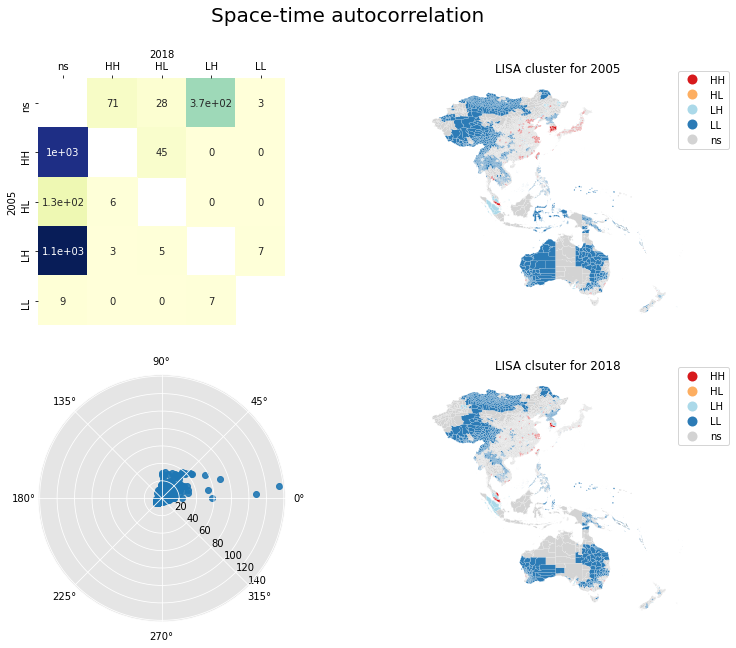

In [12]:
fig, axs = dynamic_lisa_composite(rose, satellite)
axs[0].set_ylabel('2005')
axs[0].set_xlabel('2018')
axs[1].set_title('LISA cluster for 2005')
axs[3].set_title('LISA clsuter for 2018')

# exponents = number of decimals after the number
#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-spacetime.png", dpi = 72)

## Alternative visualisation for rose diagram

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7f2a0716dd10>)

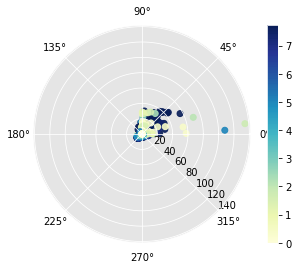

In [13]:
# condition on the spatial lag of starting relative economic density
rose.plot(attribute=rose.lag[:,0])

#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-rose.png", dpi = 72)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2a04647850>)

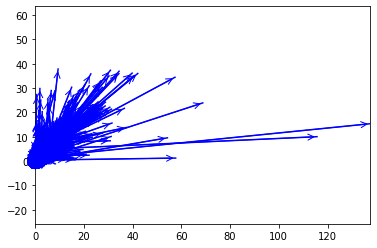

In [14]:
rose.plot_vectors() # lisa vectors

#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-arrow.png", dpi = 72)

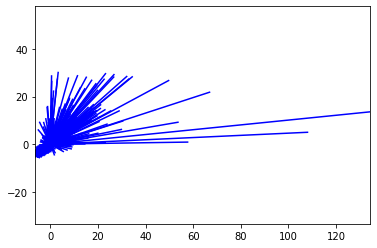

In [15]:
rose.plot_origin() # origin standardized

## Inference

In [16]:
rose.cuts

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       6.28318531])

In [17]:
rose.counts

array([7624, 1006, 1485, 2927,  783])

In [18]:
rose.permute(permutations=999)
rose.p

array([0.002, 0.   , 0.   , 0.   , 0.   ])

Source of tutorials:
1. https://splot.readthedocs.io/en/latest/generated/splot.giddy.dynamic_lisa_composite.html
2. https://pysal.org/giddy/DirectionalLISA.html